# Piquaf notebook

Copyright (c) 2023, Cibby Pulikkaseril
All rights reserved.

This source code is licensed under the BSD-style license found in the
LICENSE file in the root directory of this source tree. 

Piquaf is a open source Python tool to create <b>P</b>ublication <b>QUA</b>lity <b>F</b>igures.

Github link: https://github.com/acoustic-cib/piquaf


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from piquaf.extools import get_title, get_xlabel, get_ylabel, extract_data
from piquaf.extools import save_line_to_file
import tempfile

We'll create a simple figure with two plots, axis labels, title and a legend.

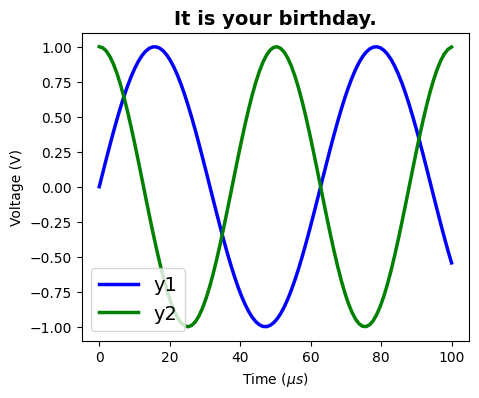

In [28]:
fig, ax = plt.subplots(figsize=(5,4))    # define fig and axes

x = np.linspace(0,100,100)   
y1 = np.sin(x/10)       
y2 = np.cos(x/8)       

ax.plot(x, y1, linewidth=2.5, label='y1') 
ax.plot(x, y2, linewidth=2.5, label='y2') 

ax.lines[0].set_color('b')
ax.lines[1].set_color('g')

#add titles, x labels, y labels, legend
title   = ax.set_title('It is your birthday.', fontsize=14, fontweight='bold')
xlabels = ax.set_xlabel('Time ($\mu s$)')
ylabels = ax.set_ylabel('Voltage (V)')
legend  = ax.legend(fontsize=14)

Now pull all the required info out of this fig!

In [29]:
title = get_title(fig)
xlabel = get_xlabel(fig)
ylabel = get_ylabel(fig)
list_line = extract_data(fig)

In [30]:
from pyx import graph
# create data files in tmp directory

with tempfile.TemporaryDirectory() as tmpdir:

    for ind,this_line in enumerate(list_line):

        cur_dir = os.path.curdir
        out_path = os.path.join(cur_dir, f'graph2D_{ind:d}.dat')
        save_line_to_file(this_line, out_path)
        list_line[ind]['file_path'] = out_path
        print(out_path)

    # now loop again to create the graph
    g = graph.graphxy(width=10, 
                x=graph.axis.linear(min=0, max=50, title=xlabel), 
                y=graph.axis.linear(min=-0.5, max=0.5, title=ylabel), 
                key=graph.key.key(pos="br", dist=0.1))
    
    for this_line in list_line:
        
        g.plot(graph.data.file(this_line['file_path'], x=1, y=2))
    
    g.text(5, 5, title)
    g.writePDFfile("x")

.\graph2D_0.dat
.\graph2D_1.dat


TexResultError: unhandled TeX response (might be an error)
The expression passed to TeX was:
  \ProcessPyXBox{\setbox0\hbox{$\vcenter{\vrule width0pt}$}\PyXDimenVShift=\ht0\setbox0\hbox{{\gdef\PyXBoxHAlign{0.50000}\gdef\PyXFlushHAlign{0.50000}\PyXragged{}Time ($\\mu s$)}}\lower\PyXDimenVShift\box0%
  }{8}%
  \PyXInput{12}%
After parsing the return message from TeX, the following was left:
  *
  *! Argument of \\ has an extra }.
  <inserted text> 
                  \par 
  <to be read again> 
  (cut after 5 lines; use errordetail.full for all output)

In [31]:
xlabel

'Time ($\\\\mu s$)'

## Test functions

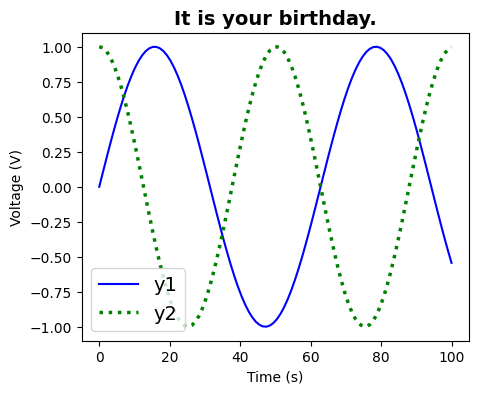

In [3]:
fig, ax = plt.subplots(figsize=(5,4))    # define fig and axes

x = np.linspace(0,100,100)   
y1 = np.sin(x/10)       
y2 = np.cos(x/8)       

ax.plot(x, y1, linewidth=1.5, label='y1') 
ax.plot(x, y2, linestyle=':', linewidth=2.5, label='y2') 

ax.lines[0].set_color('b')
ax.lines[1].set_color('g')

#add titles, x labels, y labels, legend
title   = ax.set_title('It is your birthday.', fontsize=14, fontweight='bold')
xlabels = ax.set_xlabel('Time (s)')
ylabels = ax.set_ylabel('Voltage (V)')
legend  = ax.legend(fontsize=14)

In [5]:
def test_get_title():
    title = get_title(fig)
    assert title == 'It is your birthday.', print('get_title caused an error')

def test_get_xlabel():
    xlabel = get_xlabel(fig)
    assert xlabel == 'Time (s)', print('get_xlabel caused an error')

def test_get_ylabel():
    ylabel = get_ylabel(fig)
    assert ylabel == 'Voltage (V)', print('get_ylabel caused an error')

    


In [6]:
def test_extract_data():

    list_line = extract_data(fig)
    
    label1 = list_line[0]['label']
    label2 = list_line[1]['label']
    color1 = list_line[0]['color']
    color2 = list_line[1]['color']
    ls1 = list_line[0]['line_style']
    ls2 = list_line[1]['line_style']
    lw1 = list_line[0]['line_width']
    lw2 = list_line[1]['line_width']

    assert (label1 == 'y1') & (label2 == 'y2'), "Error with extracting labels"
    assert (color1 == 'b') & (color2 == 'g'), "error with extracting color"
    assert (ls1 == '-') & (ls2 == ':'), "error with extracting linestyle"
    assert (lw1 == 1.5) & (lw2 == 2.5), 'error with extracting linewidth'

In [7]:
test_get_title()
test_get_xlabel()
test_get_ylabel()
test_extract_data()

In [4]:
from pyx import graph

g = graph.graphxy(width=10)
g.plot(graph.data.file("test.dat", x=1, y=2))
g.writePDFfile("x")

FileNotFoundError: [Errno 2] No such file or directory: 'test.dat'

## Original working code

In [33]:
import tempfile
import os
from pyx import graph
from piquaf.extools import get_title, get_xlabel, get_ylabel, extract_data
from piquaf.plt2pyx import createLine2D
from numpy import savetxt, column_stack, array

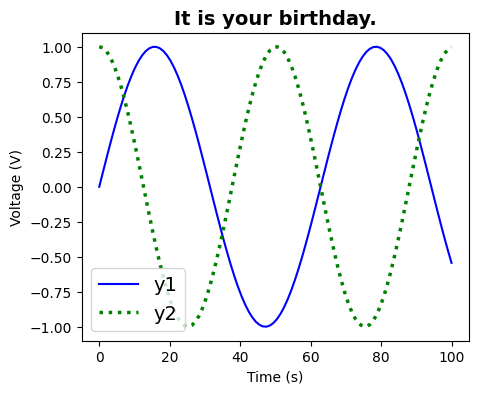

In [48]:
fig, ax = plt.subplots(figsize=(5,4))    # define fig and axes

x = np.linspace(0,100,100)   
y1 = np.sin(x/10)       
y2 = np.cos(x/8)       

ax.plot(x, y1, linewidth=1.5, label='y1') 
ax.plot(x, y2, linestyle=':', linewidth=2.5, label='y2') 

ax.lines[0].set_color('b')
ax.lines[1].set_color('g')

#add titles, x labels, y labels, legend
title   = ax.set_title('It is your birthday.', fontsize=14, fontweight='bold')
xlabels = ax.set_xlabel('Time (s)')
ylabels = ax.set_ylabel('Voltage (V)')
legend  = ax.legend(fontsize=14)

In [49]:
title = get_title(fig)
xlabel = get_xlabel(fig)
ylabel = get_ylabel(fig)
list_line = extract_data(fig)
fname = 'graph'

In [61]:
cur_dir = os.path.curdir


# First create datafiles
data_file_list = []
for ind, this_line in enumerate(list_line):
    x = array(this_line["x"])
    y = array(this_line["y"])

    data_file_list.append(f"{fname:s}_{ind:d}.dat")
    savetxt(os.path.join(cur_dir,data_file_list[ind]), column_stack([x, y]), fmt="%.4f", delimiter=" ")

# next create PxY graph
g = graph.graphxy(width=10, 
                x=graph.axis.linear(min=0, max=50, title=xlabel), 
                y=graph.axis.linear(min=-0.5, max=0.5), 
                key=graph.key.key(pos="br", dist=0.1))
for ind, this_df in enumerate(data_file_list):
    g.plot(graph.data.file(this_df, x=1, y=2, title=list_line[ind]['label']), styles=line_style)

g.text(5, 5, title, [text.halign.boxcenter])

g.writePDFfile(fname)
    

In [57]:
list_line[0]

{'label': 'y1',
 'color': 'b',
 'draw_style': 'default',
 'line_style': '-',
 'line_width': 1.5,
 'x': array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
          4.04040404,   5.05050505,   6.06060606,   7.07070707,
          8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
         12.12121212,  13.13131313,  14.14141414,  15.15151515,
         16.16161616,  17.17171717,  18.18181818,  19.19191919,
         20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
         24.24242424,  25.25252525,  26.26262626,  27.27272727,
         28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
         32.32323232,  33.33333333,  34.34343434,  35.35353535,
         36.36363636,  37.37373737,  38.38383838,  39.39393939,
         40.4040404 ,  41.41414141,  42.42424242,  43.43434343,
         44.44444444,  45.45454545,  46.46464646,  47.47474747,
         48.48484848,  49.49494949,  50.50505051,  51.51515152,
         52.52525253,  53.53535354,  54.54545455,  55.55555556,
  